# Installing packages

We import and all the libraries needed for our data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
from wordcloud import WordCloud


warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akashsavanur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing Email dataset

#### We load our dataset named "Phishing" into a variable called data using the pandas data frame function.

In [2]:
data = pd.read_csv("Phishing.csv")
data['length'] = data['Email Text'].apply(lambda x: len(str(x)))
data["length"].describe()

count    1.865000e+04
mean     2.753292e+03
std      1.248141e+05
min      1.000000e+00
25%      4.030000e+02
50%      8.800000e+02
75%      1.879750e+03
max      1.703669e+07
Name: length, dtype: float64

# Data Preprocessing

We start cleaning the dataset to get it ready for analysis.

We start of finding the NULL values in the dataset

In [3]:
data.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
length         0
dtype: int64

There are 16 NULL values and we use the built-in python functions to drop them

In [4]:
data.dropna(inplace=True,axis=0)
data.drop_duplicates(inplace=True)

### We created a word cloud to check the frequency of the words
 We remove all the unnecessary numbers and words to make our dataset more accurate.

In [5]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'Â', '', text)

    text = re.sub(r'1/2ï', '', text)

    text = re.sub(r'â', '', text)

    text = re.sub(r'e mail', '', text)

    text = re.sub(r'email', '', text)

    text = re.sub(r'3d', '', text)

    text = re.sub(r'ï', '', text)

    text = re.sub(r'hou ', '', text)

    text = re.sub(r' 000 ', ' ', text)

    text = re.sub(r' e  ', ' ', text)

    text = re.sub(r' 00 ', ' ', text)

    text = re.sub(r' enron ', ' ', text)


    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
data["Email Text"] =data["Email Text"].apply(preprocess_text)
data.dropna(subset=['Email Text'], inplace=True)


In [6]:
data.shape

(18634, 4)

In [7]:
data.head()

,Unnamed: 0,Email Text,Email Type,length
0,0,re 6 1100 disc uniformitarianism re 1086 sex l...,Safe Email,1030
1,1,the other side of galicismos galicismo is a sp...,Safe Email,479
2,2,re equistar deal tickets are you still availab...,Safe Email,1245
3,3,hello i am your hot lil horny toy i am the one...,Phishing Email,688
4,4,software at incredibly low prices 86 lower dra...,Phishing Email,441


## Structured labelling for ease of analysis

We label the phishing emails as "1" and safe emails as "0" for easier analysis

In [8]:
#convert the categorical label into numerical
lbl = LabelEncoder()
data['Email Type'] = lbl.fit_transform(data['Email Type'])
data['Email Type'] = 1 - data['Email Type']### 1 denotes pishing and 0 denotes safe

## Exploratory Data Analysis

We try to gain initial insights into the data by checking the frequency of phishing emails and the length statistics.

In [9]:
data['Email Type'].value_counts()

0    11322
1     7312
Name: Email Type, dtype: int64

<Axes: >

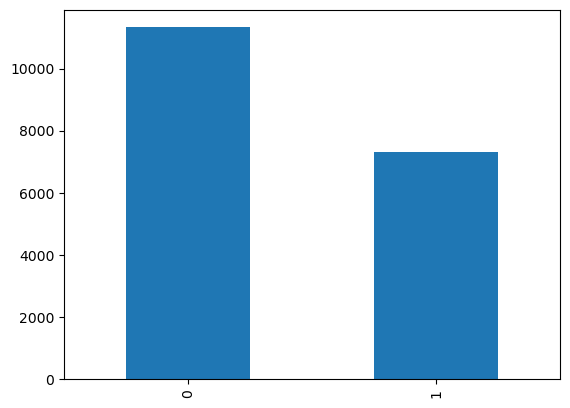

In [10]:
data['Email Type'].value_counts().plot(kind='bar')

In [11]:
data_sf = data[data["Email Type"] == 0]
data_ph = data[data["Email Type"] == 1]

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Standard number format

In [13]:
data_ph['length'] = data_ph['Email Text'].apply(lambda x: len(str(x)))
data_ph["length"].describe()

count     7312.000
mean      1434.260
std       3063.898
min          0.000
25%        312.000
50%        632.000
75%       1370.250
max     122479.000
Name: length, dtype: float64

In [ ]:
data_sf['length'] = data_sf['Email Text'].apply(lambda x: len(str(x)))
data_sf["length"].describe()

count      11322.000
mean        3047.126
std       140733.596
min            0.000
25%          372.000
50%          829.000
75%         1753.750
max     14970098.000
Name: length, dtype: float64

# Boxplot, Histogram and Violin plot

This helps us gain visual insights on the data

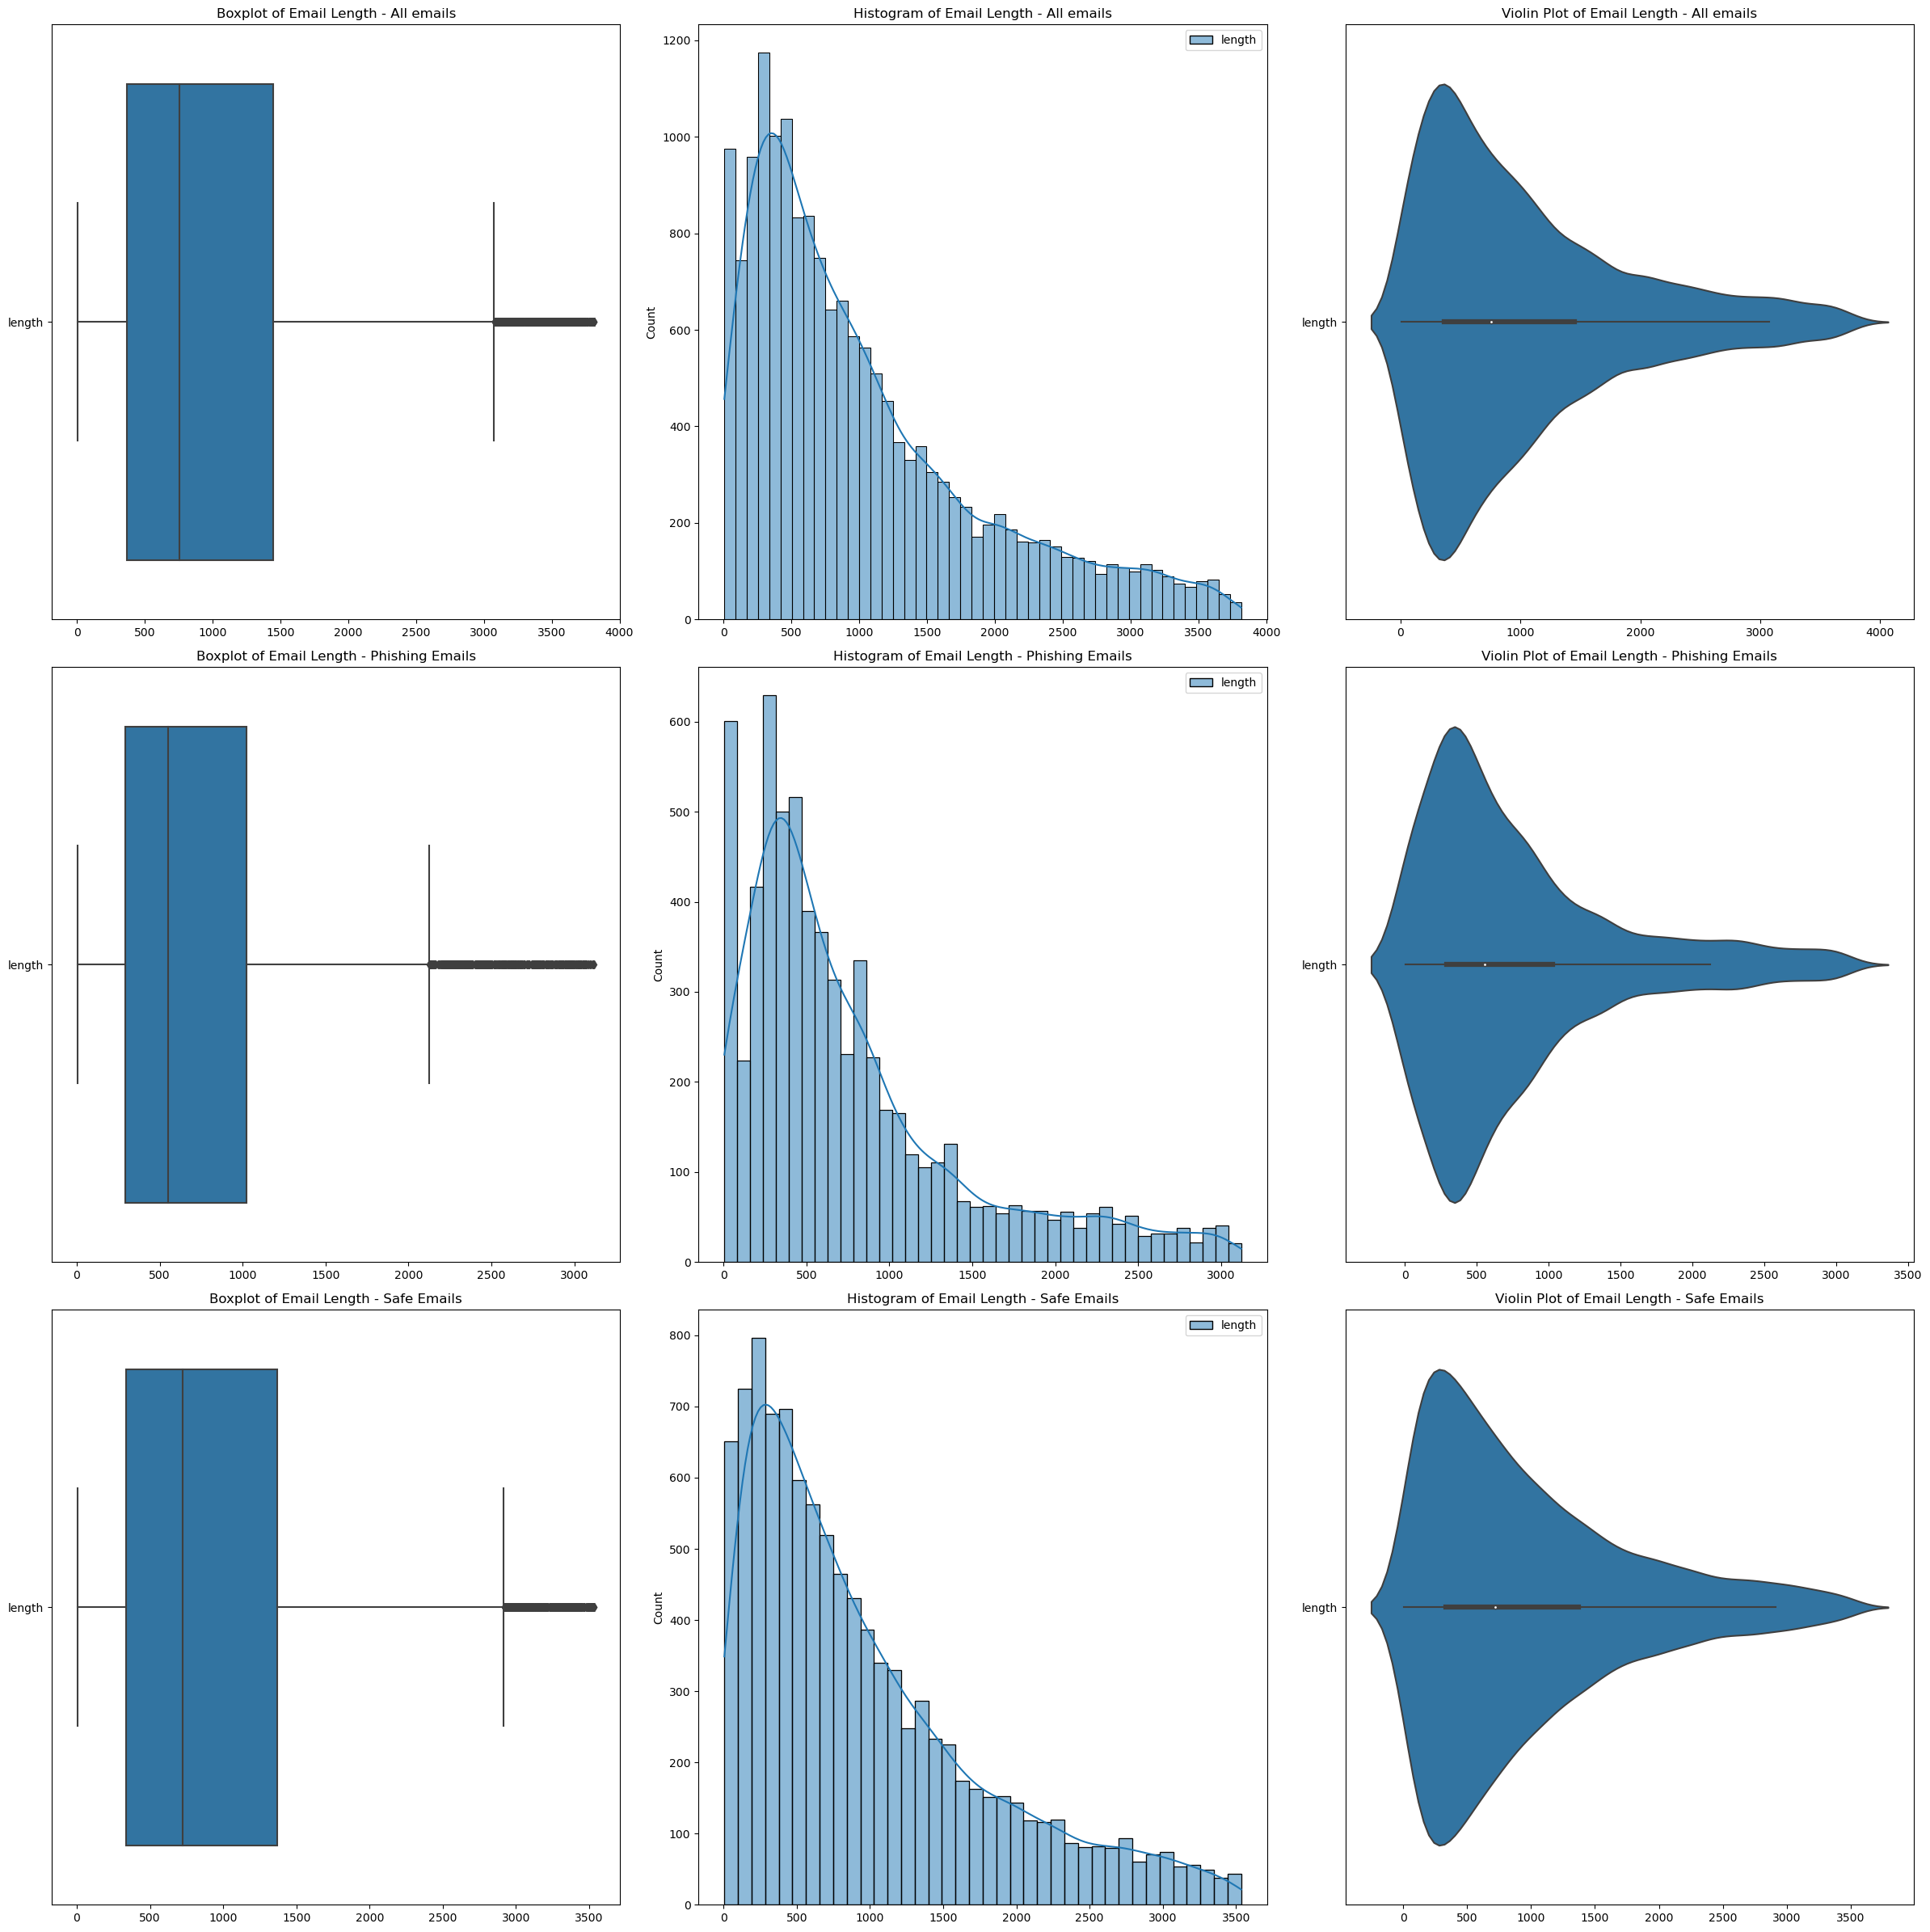

In [ ]:
# Define the lower and upper bounds based on percentiles
lower_bound = data['length'].quantile(0.01)  # 1st percentile
upper_bound = data['length'].quantile(0.9)  # 90th percentile

# Filter the DataFrame to remove outliers
filtered_data = data[(data['length'] >= lower_bound) & (data['length'] <= upper_bound)]

# Length DataFrame after removing outliers
length = pd.DataFrame(filtered_data["length"])

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

for i, (data_subset, title) in enumerate(zip([data, data_ph, data_sf], ['All emails', 'Phishing Emails', 'Safe Emails'])):
    # Define the lower and upper bounds based on percentiles
    lower_bound = data_subset['length'].quantile(0.01)  # 1st percentile
    upper_bound = data_subset['length'].quantile(0.9)  # 90th percentile

    # Filter the DataFrame to remove outliers
    filtered_data = data_subset[(data_subset['length'] >= lower_bound) & (data_subset['length'] <= upper_bound)]

    # Length DataFrame after removing outliers
    length = pd.DataFrame(filtered_data["length"])

    # Boxplot
    sb.boxplot(data=length, orient="h", ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of Email Length - {title}')

    # Histogram
    sb.histplot(data=length, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of Email Length - {title}')

    # Violin plot
    sb.violinplot(data=length, orient="h", ax=axes[i, 2])
    axes[i, 2].set_title(f'Violin Plot of Email Length - {title}')

plt.tight_layout()
plt.show()


# For Safe Emails

We split the dataset into two, safe emails and phishing emails

In [ ]:
all_mails_sf = " ".join(data_sf['Email Text'])

# WordCloud

We individually create wordclouds for each type of email to find out the most commonly words

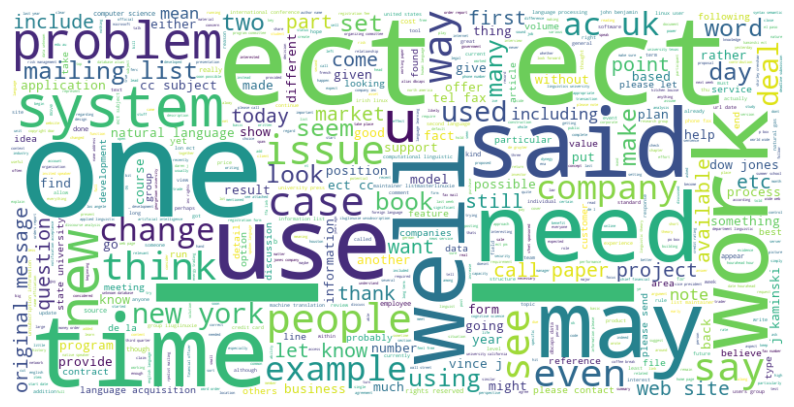

In [ ]:
from wordcloud import WordCloud
#combine all rows into a single string

tokens = word_tokenize(all_mails_sf)

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(" ".join(filtered_tokens))
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# For phishing emails

In [ ]:
all_mails_ph = " ".join(data_ph['Email Text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akashsavanur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


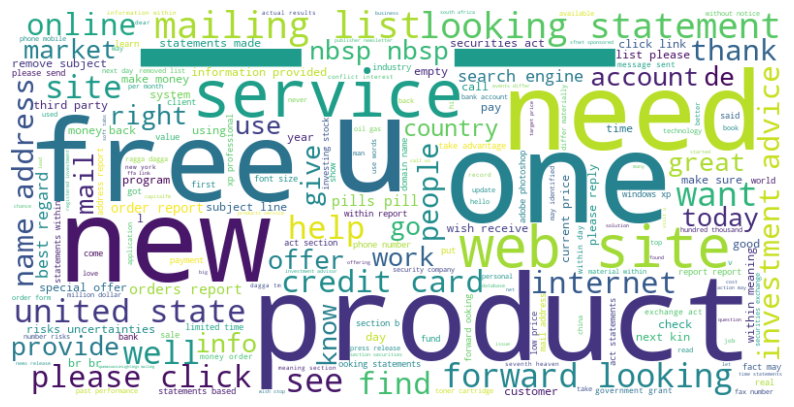

In [ ]:
tokens = word_tokenize(all_mails_ph)

# Download stopwords list if not already downloaded
nltk.download('stopwords')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(" ".join(filtered_tokens))
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenization

Tokenization is the process of breaking down a piece of text, like a sentence or a paragraph, into individual words or “tokens.” These tokens are the basic building blocks of language, and tokenization helps computers understand and process human language by splitting it into manageable units.

We also make sure that while tokenizing, we do not incorporate the stopwords. Stopwords are common words in a language that are often removed from text data during natural language processing (NLP) tasks because they are considered to carry little or no significant meaning or information about the content of the text. These words are extremely common and appear frequently across various documents but don't contribute much to the context or semantics of the text.

In [ ]:
from collections import Counter
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def Tokenize(column, seq_len):
    stop_words = set(stopwords.words('english'))
    stop_words |= {'_'}  # Add underscore to stop words
    stop_words |= {str(i) for i in range(10)}
    stop_words.add('e')
    stop_words.add('20')
    # Create a list to store the filtered words
    filtered_corpus = []
    for text in column:
        filtered_words = [word for word in text.split() if word.lower() not in stop_words]
        filtered_corpus.extend(filtered_words)

    count_words = Counter(filtered_corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split() if word.lower() not in stop_words]
        text_int.append(r)

    features = np.zeros((len(text_int), seq_len), dtype=int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[:seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akashsavanur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Word Count vs Word

Here We can see that phishing emails use deceiving words such as “free”, “busniess”,”company”,etc. and promoting words such as “click”, “order” and “make”.

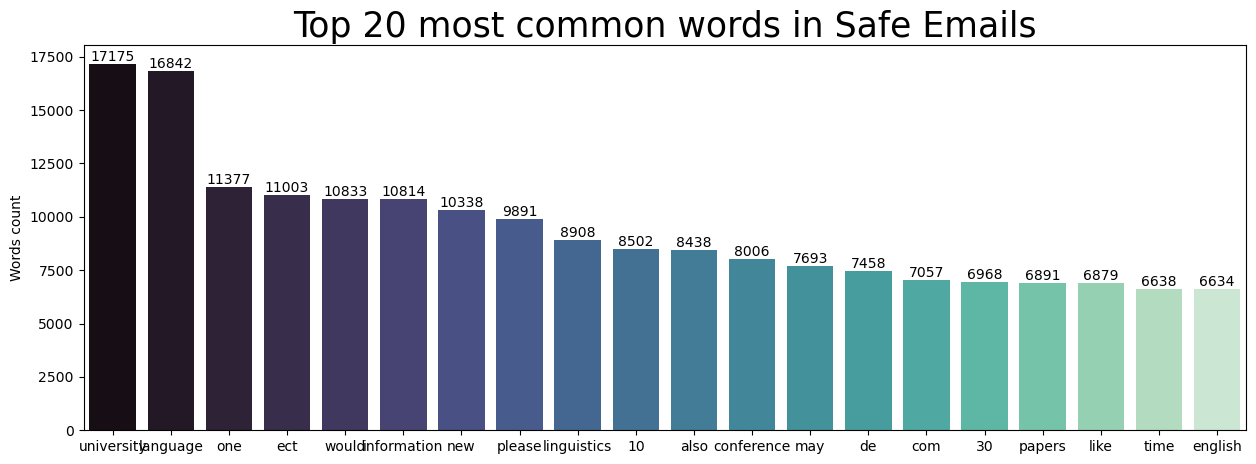

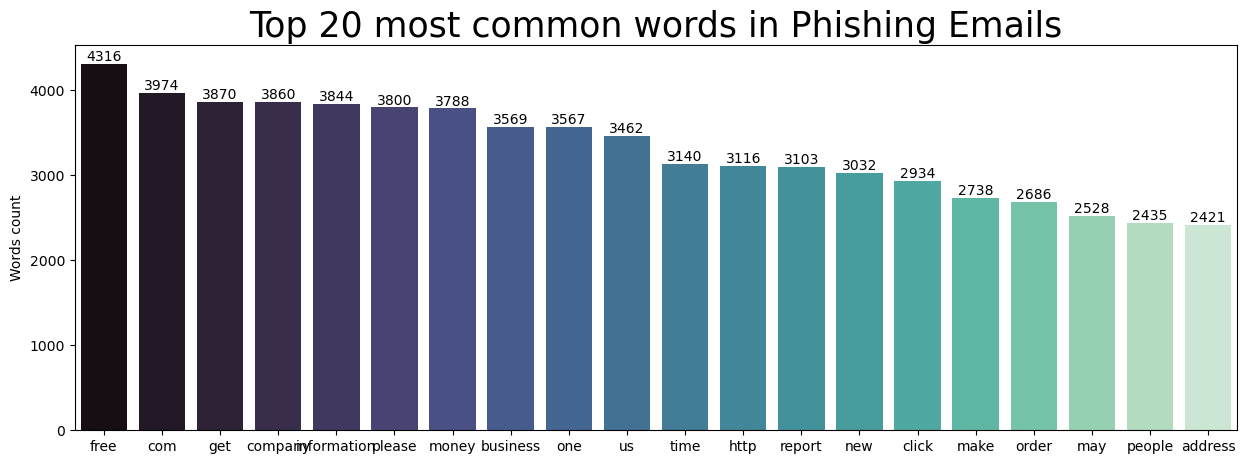

In [ ]:
emails = ["Safe Emails", "Phishing Emails"]

for i in range(0,2):
    vocabulary, tokenized_column = Tokenize(data[data["Email Type"] == i]["Email Text"], 300)
    keys = []
    values = []
    for key, value in vocabulary[:20]:
        keys.append(key)
        values.append(value)
    plt.figure(figsize=(15, 5))
    ax = sb.barplot(x=keys,y=values, palette='mako')
    plt.title(f'Top 20 most common words in {emails[i]}', size=25)
    ax.bar_label(ax.containers[0])
    plt.ylabel("Words count")
    plt.show()

# Sentiment Analysis


It is an NLP technique that assesses emotions in text. It involves preprocessing text, extracting features like word frequencies, and using models like lexicon-based approaches, machine learning (e.g., logistic regression, SVM, Random Forest), or deep learning (e.g., LSTM, BERT, GRU).



We can see that phishing emails tend evoke more emotions than safe emails.

In [ ]:
import pandas as pd
from textblob import TextBlob

# Sample email texts (replace with your actual email texts)
phishing_emails = data_ph["Email Text"].tolist()  # Assuming "Email Text" is the column name containing email texts for phishing emails
safe_emails = data_sf["Email Text"].tolist()  # Assuming "Email Text" is the column name containing email texts for safe emails

# Function to perform sentiment analysis and return DataFrame
def analyze_sentiment(emails):
    sentiments = []
    for email in emails:
        blob = TextBlob(email)
        sentiment_score = abs(blob.sentiment.polarity)  # Get the absolute value of sentiment polarity
        sentiments.append(sentiment_score)
    return pd.DataFrame({"Sentiment_Score": sentiments})

# Analyze sentiment for phishing and safe emails
phishing_sentiments_df = analyze_sentiment(phishing_emails)
safe_sentiments_df = analyze_sentiment(safe_emails)

# Add sentiment scores as new columns in the original datasets
data_ph["Sentiment_Score"] = phishing_sentiments_df
data_sf["Sentiment_Score"] = safe_sentiments_df

# Print average sentiment scores
print("Average sentiment score for phishing emails:", phishing_sentiments_df["Sentiment_Score"].mean())
print("Average sentiment score for safe emails:", safe_sentiments_df["Sentiment_Score"].mean())

# Optionally, concatenate phishing and safe email dataframes if needed
data_combined = pd.concat([data_ph, data_sf], ignore_index=True)



Average sentiment score for phishing emails: 0.187902016184907
Average sentiment score for safe emails: 0.11995503707346718


In [ ]:
data_combined
data_combined.dropna(subset=['Sentiment_Score'], inplace=True)


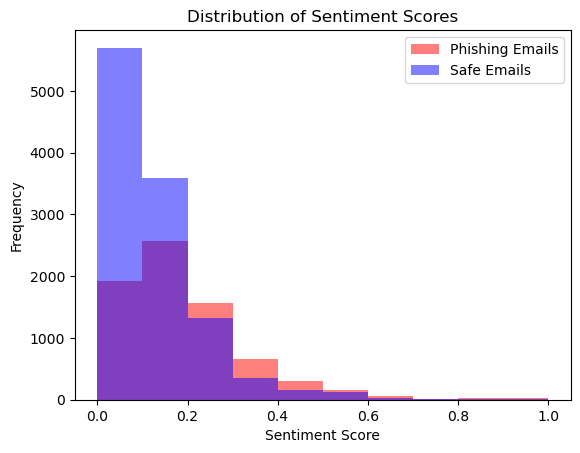

In [ ]:
# Histogram for Phishing Emails
plt.hist(phishing_sentiments_df["Sentiment_Score"], bins=10, color='red', alpha=0.5, label='Phishing Emails')
# Histogram for Safe Emails
plt.hist(safe_sentiments_df["Sentiment_Score"], bins=10, color='blue', alpha=0.5, label='Safe Emails')

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Machine Learning


We split the data into train and test with the proportion 75:25

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score ,precision_score, f1_score, recall_score,classification_report,confusion_matrix

x = data['Email Text']
y,class_names = pd.factorize(data['Email Type'],sort=True)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

x_train = [str(x) for x in x_train]
x_test  = [str(x) for x in x_test]

## Model Function

### We create a default function for a model and its statistics to make it easier for us to implement different models.

In [ ]:
def Classifier(model):
    vectorizer   = TfidfVectorizer()
    vectorizer.fit(data['Email Text'])
    x_train_vecs = vectorizer.transform(x_train)
    x_test_vecs  = vectorizer.transform(x_test)

    model.fit(x_train_vecs, y_train)
    y_train_pred = model.predict(x_train_vecs)
    y_test_pred = model.predict(x_test_vecs)

    print('Training Accuracy:{:.3f}'.format(accuracy_score(y_train, y_train_pred)))
    print('Test Accuracy:{:.3f}'.format(accuracy_score(y_test, y_test_pred)))
    print("Training Classification Report: \n", classification_report(y_train, y_train_pred))
    print("Test Classification Report: \n", classification_report(y_test, y_test_pred))

    # Confusion matrices and heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Training confusion matrix and heatmap
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    sb.heatmap(train_conf_matrix, annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names, ax=axes[0], annot_kws={"fontsize": 20})
    axes[0].set_xlabel('Predicted', fontsize=20)
    axes[0].set_ylabel('True', fontsize=20)
    axes[0].set_title('Training Confusion Matrix', fontsize=20)

    # Test confusion matrix and heatmap
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    sb.heatmap(test_conf_matrix, annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names, ax=axes[1], annot_kws={"fontsize": 20})
    axes[1].set_xlabel('Predicted', fontsize=20)
    axes[1].set_ylabel('True', fontsize=20)
    axes[1].set_title('Test Confusion Matrix', fontsize=20)

    plt.tight_layout()
    plt.show()


## Naive Bayes

Training Accuracy:0.922
Test Accuracy:0.898
Training Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      8507
           1       0.97      0.83      0.89      5468

    accuracy                           0.92     13975
   macro avg       0.93      0.90      0.92     13975
weighted avg       0.93      0.92      0.92     13975

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2815
           1       0.96      0.77      0.86      1844

    accuracy                           0.90      4659
   macro avg       0.91      0.88      0.89      4659
weighted avg       0.91      0.90      0.90      4659



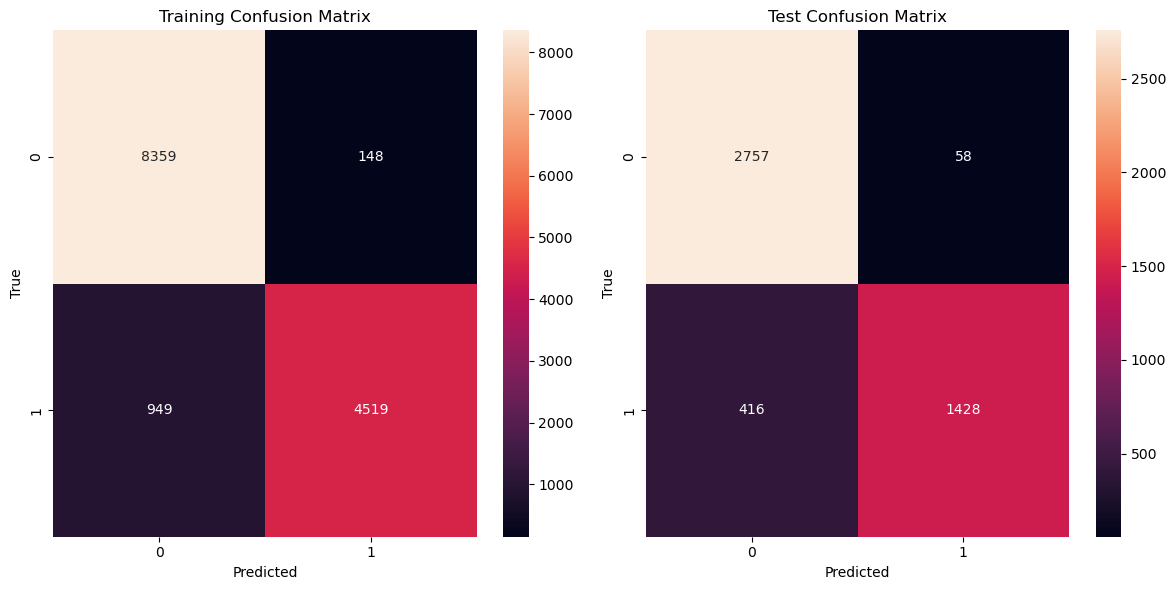

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
Classifier(model)


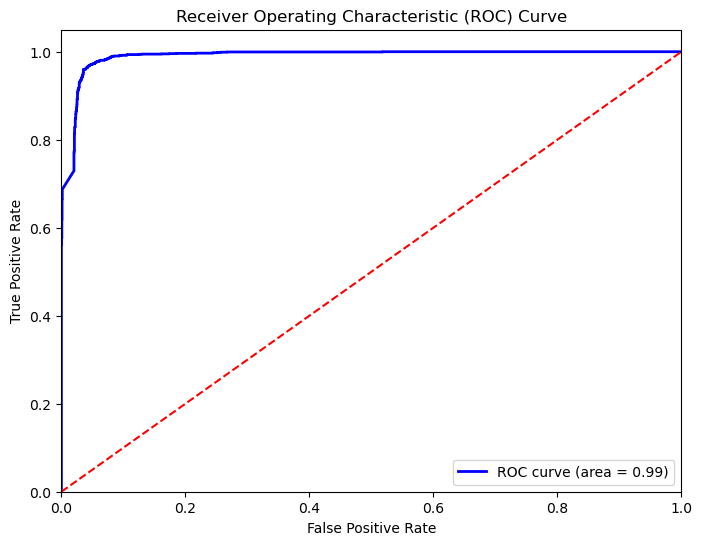

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, x_test, y_test):
    # Predict probabilities
    y_probs = model.predict_proba(x_test)
    # Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
    # Calculate area under the curve
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the function with your trained model and test data
vectorizer   = TfidfVectorizer()
vectorizer.fit(data['Email Text'])
x_test_vecs  = vectorizer.transform(x_test)
plot_roc_curve(model, x_test_vecs, y_test)


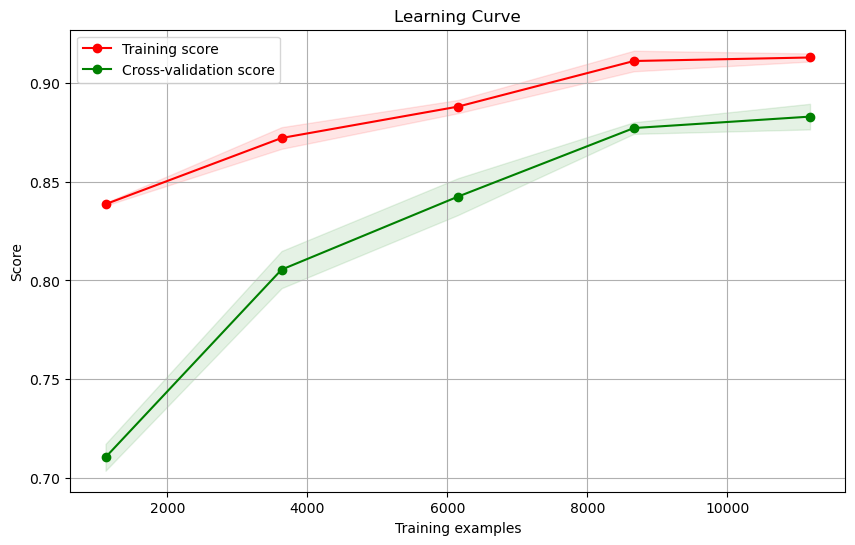

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Call the function with your trained model and training data
vectorizer   = TfidfVectorizer()
vectorizer.fit(data['Email Text'])
x_train_vecs = vectorizer.transform(x_train)
plot_learning_curve(model, x_train_vecs, y_train)


## Logistic Regression

Training Accuracy:0.977
Test Accuracy:0.968
Training Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      8486
           1       0.96      0.98      0.97      5489

    accuracy                           0.98     13975
   macro avg       0.97      0.98      0.98     13975
weighted avg       0.98      0.98      0.98     13975

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2836
           1       0.96      0.96      0.96      1823

    accuracy                           0.97      4659
   macro avg       0.97      0.97      0.97      4659
weighted avg       0.97      0.97      0.97      4659



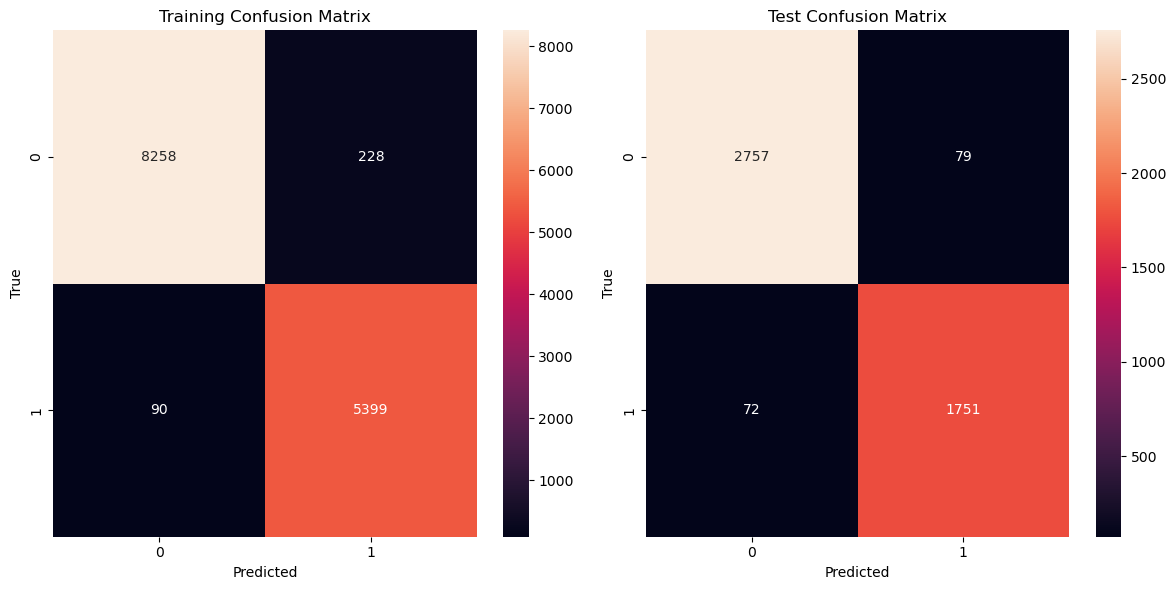

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
Classifier(model)


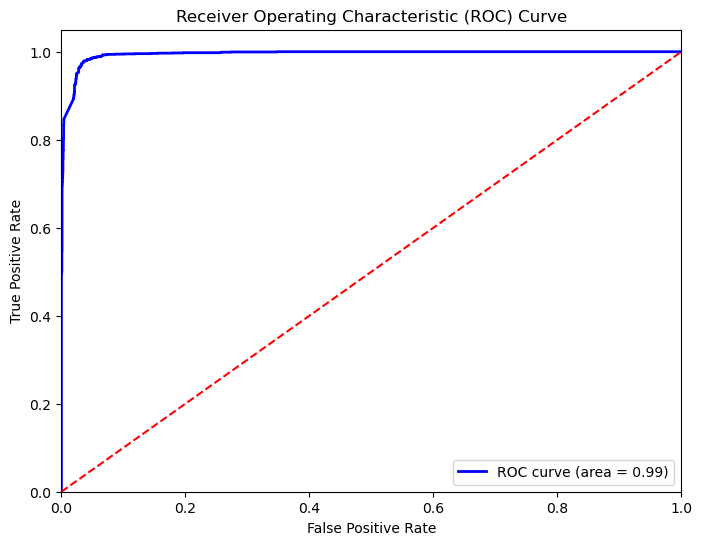

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, x_test, y_test):
    # Predict probabilities
    y_probs = model.predict_proba(x_test)
    # Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
    # Calculate area under the curve
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Call the function with your trained model and test data
vectorizer   = TfidfVectorizer()
vectorizer.fit(data['Email Text'])
x_test_vecs  = vectorizer.transform(x_test)
plot_roc_curve(model, x_test_vecs, y_test)


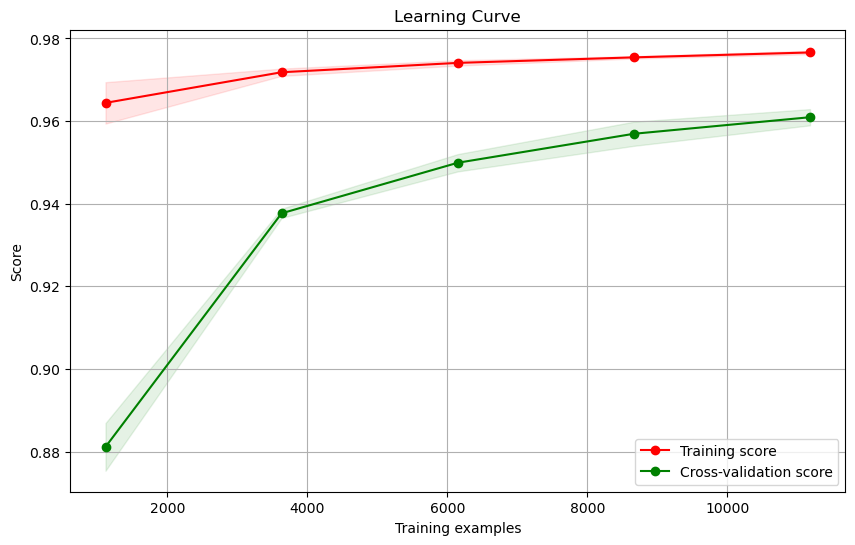

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Call the function with your trained model and training data
vectorizer   = TfidfVectorizer()
vectorizer.fit(data['Email Text'])
x_train_vecs = vectorizer.transform(x_train)
plot_learning_curve(model, x_train_vecs, y_train)


## Random Forest

## **Random Forest** is a popular ensemble learning method used for both classification and regression tasks. It builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting.

##Here's a brief explanation of how Random Forest works:

###**Random Sampling**:
Random Forest randomly selects a subset of the training data and features to build each decision tree. This helps in introducing diversity among the trees and reducing the risk of overfitting.

###**Decision Trees**:
Each decision tree is constructed by recursively splitting the data based on the feature that provides the best split, according to some criterion (e.g., Gini impurity or information gain).

###**Voting**:
During prediction, each decision tree in the forest independently predicts the class label (in case of classification) or the target value (in case of regression). The final prediction is determined by majority voting (for classification) or averaging (for regression) the predictions of all trees.

##For the detection of phishing emails, Random Forest can be effective due to the following reasons:

###**Feature Importance**:
Random Forest can automatically determine which features are most important for distinguishing between phishing and legitimate emails. This helps in identifying the key indicators of phishing emails.

###**Robustness**:
Random Forest is robust to overfitting and noise in the data, thanks to the ensemble of decision trees and the random sampling of data and features. This makes it less prone to errors caused by irrelevant or noisy features commonly found in email data.

###**High Accuracy**:
Random Forest typically yields high accuracy in classification tasks, even with relatively complex and high-dimensional data like email content and metadata. It can effectively capture nonlinear relationships and interactions between features.

###**Generalization**:
Random Forest tends to generalize well to unseen data, making it suitable for detecting new and previously unseen phishing email patterns.

In summary, Random Forest helps to solve the problem of phishing email detection by efficiently leveraging the features in the email data, handling noisy and high-dimensional data, providing high accuracy, and generalizing well to new email patterns.

In [ ]:
# passing object
tf = TfidfVectorizer(stop_words='english',max_features=10000) #dimension reduction
feature_x = tf.fit_transform(data['Email Text']).toarray()

In [ ]:
y_tf = np.array(data['Email Type']) # convert the label into numpy array

In [ ]:
X_tr,X_tst,y_tr,y_tst = train_test_split(feature_x,y_tf,test_size=0.2)

We have used **Stratified K-Fold Cross-Validation** in our Random Forest Model. It is a variation of K-Fold Cross-Validation that ensures each fold maintains the same proportion of observations for each target class as the complete dataset. This is especially crucial for datasets where one class might be heavily underrepresented. All folds gave similar accuracy results. Therefore, we ca conclude all the subsets of our data is useful for training our model accurately.

Training Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9029
           1       0.97      1.00      0.99      5878

    accuracy                           0.99     14907
   macro avg       0.99      0.99      0.99     14907
weighted avg       0.99      0.99      0.99     14907

Test Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2293
           1       0.94      0.96      0.95      1434

    accuracy                           0.96      3727
   macro avg       0.96      0.96      0.96      3727
weighted avg       0.96      0.96      0.96      3727



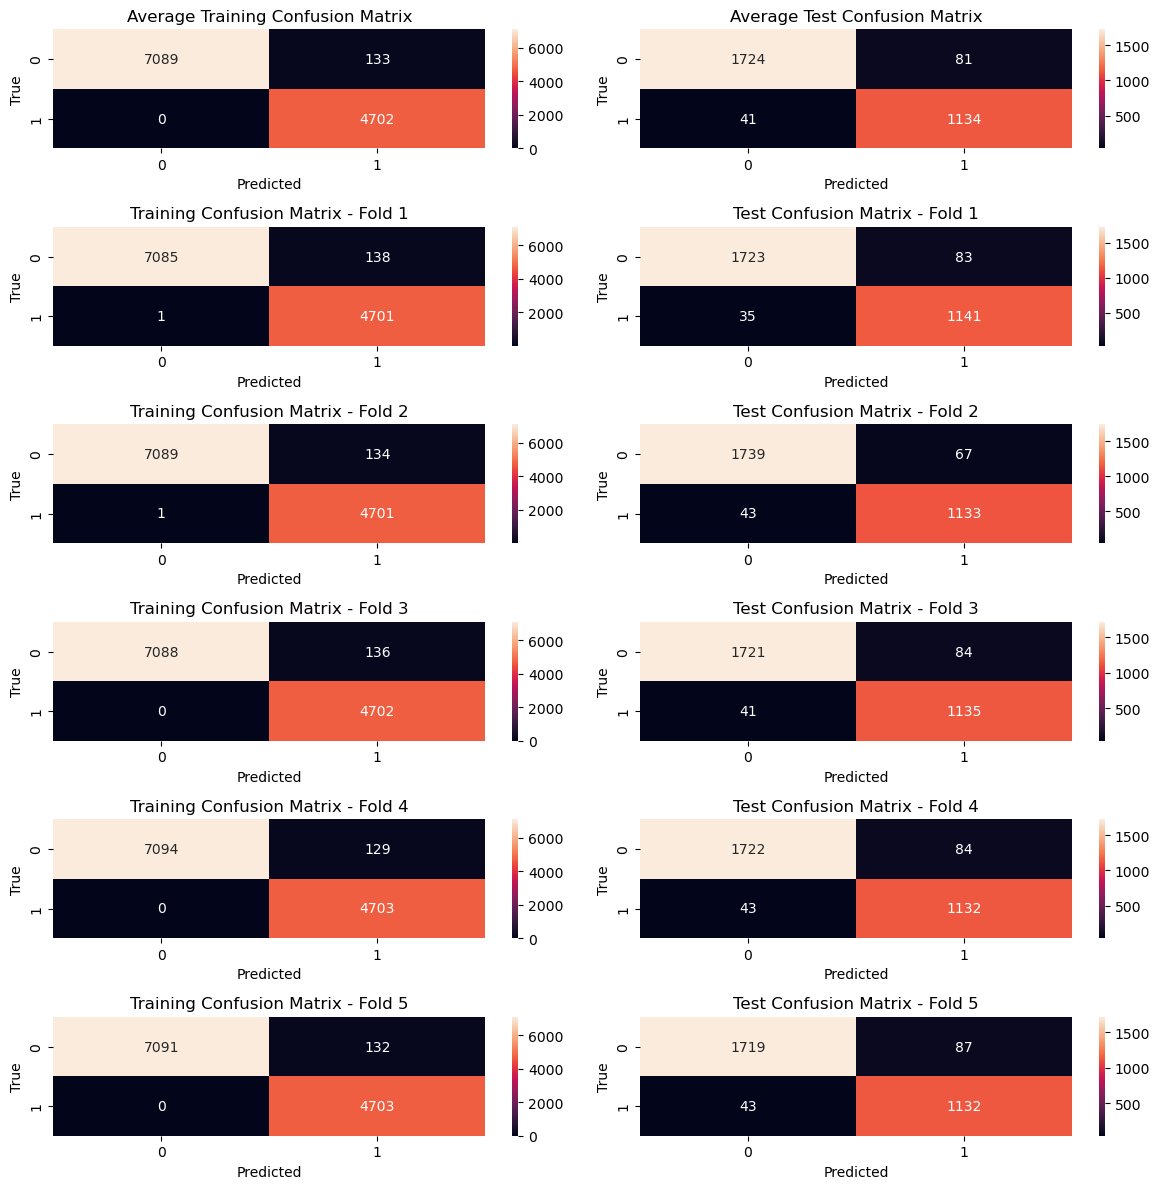

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define your classifier
rnf = RandomForestClassifier()

# Perform k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store predictions and confusion matrices
train_pred_rnf_cv = []
test_pred_rnf_cv = []
train_conf_matrices = []
test_conf_matrices = []
train_classification_reports = []
test_classification_reports = []

# Perform cross-validation
for train_index, test_index in cv.split(X_tr, y_tr):
    X_train_fold, X_test_fold = X_tr[train_index], X_tr[test_index]
    y_train_fold, y_test_fold = y_tr[train_index], y_tr[test_index]

    # Train the model
    rnf.fit(X_train_fold, y_train_fold)

    # Predictions on training and test data for this fold
    train_pred_fold = rnf.predict(X_train_fold)
    test_pred_fold = rnf.predict(X_test_fold)

    # Store predictions
    train_pred_rnf_cv.append(train_pred_fold)
    test_pred_rnf_cv.append(test_pred_fold)

    # Confusion matrix for training data
    train_conf_matrix = confusion_matrix(y_train_fold, train_pred_fold)
    train_conf_matrices.append(train_conf_matrix)

    # Confusion matrix for test data
    test_conf_matrix = confusion_matrix(y_test_fold, test_pred_fold)
    test_conf_matrices.append(test_conf_matrix)

rnf.fit(X_tr, y_tr)

y_tr_pred = rnf.predict(X_tr)
y_tst_pred = rnf.predict(X_tst)

print("Training Classification Report: \n", classification_report(y_tr, y_tr_pred))
print("Test Classification Report: \n", classification_report(y_tst, y_tst_pred))

# Convert confusion matrices to integers
avg_train_conf_matrix = np.mean(train_conf_matrices, axis=0)
avg_test_conf_matrix = np.mean(test_conf_matrices, axis=0)
avg_train_conf_matrix = avg_train_conf_matrix.astype(int)
avg_test_conf_matrix = avg_test_conf_matrix.astype(int)

# Plot average confusion matrices
fig, axes = plt.subplots(6, 2, figsize=(12, 12))

# Training confusion matrix and heatmap
sb.heatmap(avg_train_conf_matrix, annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names, ax=axes[0, 0], annot_kws={"fontsize": 20})
axes[0, 0].set_xlabel('Predicted', fontsize=20)
axes[0, 0].set_ylabel('True', fontsize=20)
axes[0, 0].set_title('Average Training Confusion Matrix', fontsize=20)

# Test confusion matrix and heatmap
sb.heatmap(avg_test_conf_matrix, annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names, ax=axes[0, 1], annot_kws={"fontsize": 20})
axes[0, 1].set_xlabel('Predicted', fontsize=20)
axes[0, 1].set_ylabel('True', fontsize=20)
axes[0, 1].set_title('Average Test Confusion Matrix', fontsize=20)

# Plot confusion matrices for each fold
for i in range(1, 6):
    # Convert confusion matrices to integers
    train_conf_matrices[i-1] = train_conf_matrices[i-1].astype(int)
    test_conf_matrices[i-1] = test_conf_matrices[i-1].astype(int)

    sb.heatmap(train_conf_matrices[i-1], annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names, ax=axes[i, 0], annot_kws={"fontsize": 20})
    axes[i, 0].set_xlabel('Predicted', fontsize=20)
    axes[i, 0].set_ylabel('True', fontsize=20)
    axes[i, 0].set_title(f'Training Confusion Matrix - Fold {i}', fontsize=20)

    sb.heatmap(test_conf_matrices[i-1], annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names, ax=axes[i, 1], annot_kws={"fontsize": 20})
    axes[i, 1].set_xlabel('Predicted', fontsize=20)
    axes[i, 1].set_ylabel('True', fontsize=20)
    axes[i, 1].set_title(f'Test Confusion Matrix - Fold {i}', fontsize=20)

plt.tight_layout()
plt.show()


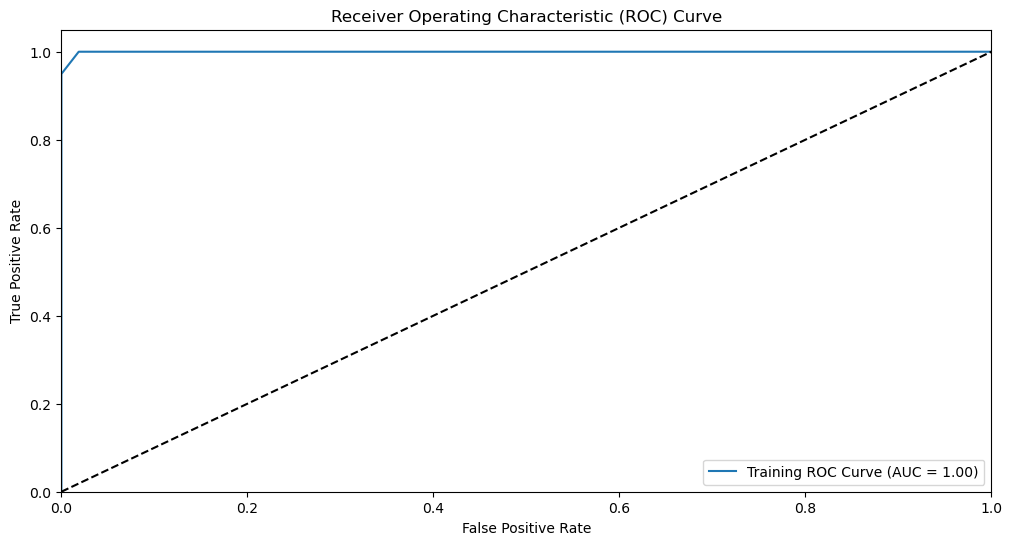

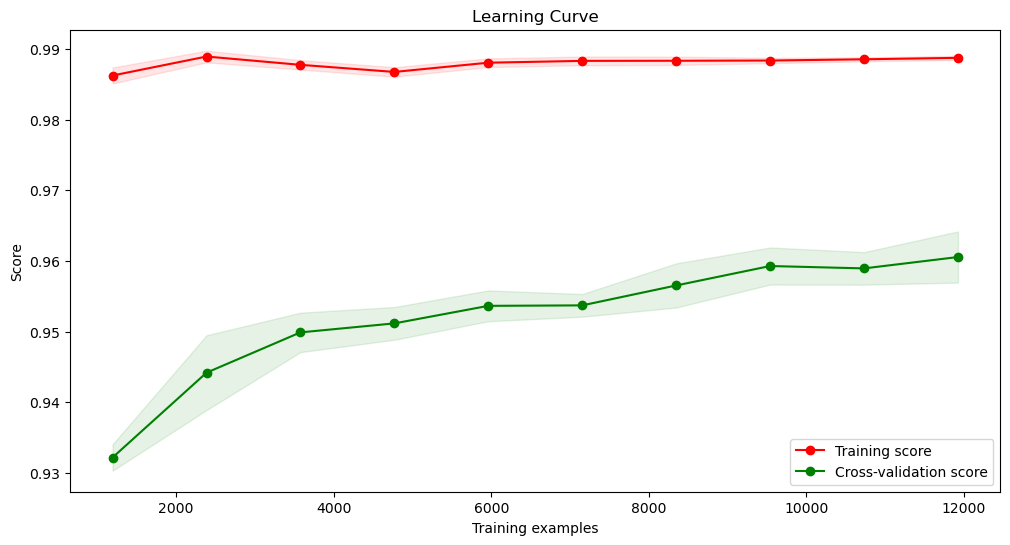

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

# Plot ROC curve
plt.figure(figsize=(12, 6))

# Training set ROC curve
train_fpr, train_tpr, _ = roc_curve(y_tr, rnf.predict_proba(X_tr)[:,1])
train_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label=f'Training ROC Curve (AUC = {train_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rnf, X_tr, y_tr, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy')

plt.figure(figsize=(12, 6))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()


## Comparable accuracies in all subsets of data. Therefore, the model can be trained using the entire dataset.

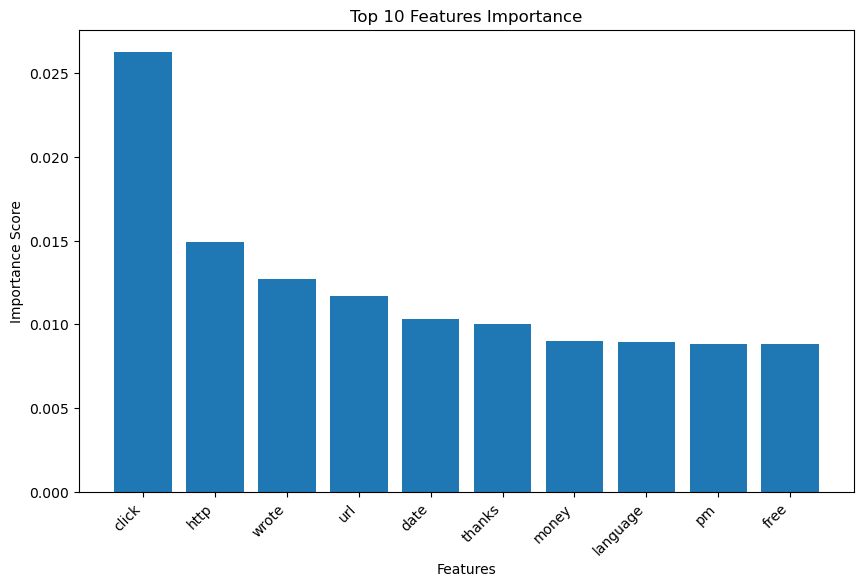

In [ ]:
# Retain feature names from the original DataFrame
feature_names = tf.get_feature_names_out()

# Train the Random Forest classifier
rnf.fit(X_tr, y_tr)

# Get feature importances
feature_importances = rnf.feature_importances_

# Get the top n features and their indices
top_n = 10  # Change this value according to your preference
top_indices = np.argsort(feature_importances)[::-1][:top_n]
top_features = [feature_names[i] for i in top_indices]
top_importances = feature_importances[top_indices]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top {} Features Importance'.format(top_n))
plt.show()


# GRU model for text classification

The Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture designed to address the challenges faced by traditional RNNs. Here's a detailed explanation without mathematical formulas:

### Structure:
1. GRU consists of two main gates: the reset gate and the update gate.
2. It also includes a candidate activation that computes the new candidate hidden state.

### Gate:
1. Determines how much of the previous hidden state to forget.
2. Helps in capturing long-term dependencies by selectively resetting the memory.

### Update Gate:
1. Controls how much of the new candidate hidden state to incorporate into the final hidden state.
2. Enables the model to learn when to update the memory and when to keep it unchanged.

### Candidate Hidden State:
1. Computed based on the reset gate and the current input.
2. Represents the information that the model considers relevant for the current time step.

### Candidate Hidden State:

1. Computed based on the reset gate and the current input.
2. Represents the information that the model considers relevant for the current time step.

### Final Hidden State:

1. Computed by combining the previous hidden state and the candidate hidden state using the update gate.
2. Balances between retaining important information and updating with new information.
### Advantages:

GRUs are computationally efficient compared to more complex models like LSTMs.
They are effective in capturing long-range dependencies in sequential data.
GRUs have fewer parameters, making them easier to train and deploy in practical applications.


### Relevance

This is adept at classifying phishing and non-phishing emails due to their efficient handling of sequential data, capturing nuanced patterns, and maintaining memory effectiveness with fewer parameters compared to other recurrent neural network variants. This capability enables accurate analysis of email content, crucial for detecting subtle phishing attempts.




### We Encorporate the GRU model and run 10 epochs with a batch size of 32

In [ ]:
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Email Type'])

# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Email Text'])
X = tokenizer.texts_to_sequences(data['Email Text'])

# Set maximum sequence length
max_seq_length = 150  # Adjust as needed based on your data and memory constraints
X = pad_sequences(X, maxlen=max_seq_length)

y = np.array(data['Label'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
blah = model.fit(X_train, y_train, epochs=15, batch_size=50, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 65s 215ms/step - accuracy: 0.8014 - loss: 0.3961 - val_accuracy: 0.9640 - val_loss: 0.0956
Epoch 2/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 66s 219ms/step - accuracy: 0.9769 - loss: 0.0568 - val_accuracy: 0.9659 - val_loss: 0.0998
Epoch 3/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 67s 224ms/step - accuracy: 0.9849 - loss: 0.0287 - val_accuracy: 0.9571 - val_loss: 0.1256
Epoch 4/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 67s 223ms/step - accuracy: 0.9853 - loss: 0.0305 - val_accuracy: 0.9606 - val_loss: 0.1209
Epoch 5/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 67s 224ms/step - accuracy: 0.9871 - loss: 0.0256 - val_accuracy: 0.9058 - val_loss: 0.2087
Epoch 6/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 66s 221ms/step - accuracy: 0.9846 - loss: 0.0300 - val_accuracy: 0.9640 - val_loss: 0.1328
Epoch 7/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 63s 209ms/step - accuracy: 0.9884 - loss: 0.0215 - val_accuracy: 0.9686 - val_loss: 0.1171
Epoch 8/15
299/299 ━━━━━━━━━━━━━━━━━━━━ 64s 215ms/step - accuracy: 0.9873 - loss: 0

### Now we plot a graph againts Loss and Epoch for both training and Validation loss


### Training and validation loss are metrics used to evaluate the performance of a machine learning model during training.

#### Training Loss:

1. It measures how well the model is performing on the training data.
2. The training loss is calculated based on the difference between the actual output of the model and the expected    output (labels) for the training examples.
3. The goal during training is to minimize the training loss, which indicates that the model is learning to make      accurate predictions on the training data.


#### Validation Loss:

1. It measures how well the model generalizes to new, unseen data.
2. The validation loss is calculated using a separate validation dataset that the model has not been trained on.
3. A low validation loss indicates that the model is not overfitting and can generalize well to new data.
4. Monitoring the validation loss helps in detecting overfitting, where the model memorizes the training data but      performs poorly on new data.


Ideally, both the training and validation losses should decrease during training. If the training loss continues to decrease while the validation loss increases or remains stagnant, it suggests that the model is overfitting and may not generalize well. Adjustments to the model, such as regularization techniques or modifying the model architecture, may be necessary to improve generalization.

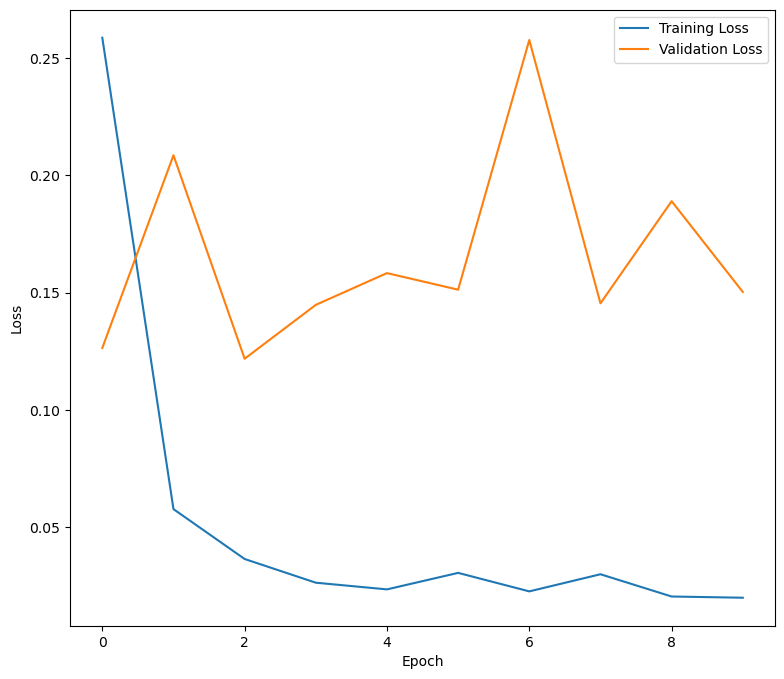

In [ ]:
# Plot training and validation loss/accuracy
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Now we plot a graph between accuracy and number of epoch for training and validation

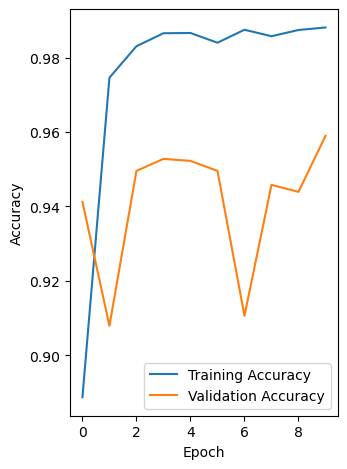

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Now we predict for the test sample

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9699 - loss: 0.1250
Test Loss: 0.1240, Test Accuracy: 0.9683
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


### Plot the ROC curve


The Receiver Operating Characteristic (ROC) curve is a graphical representation of a binary classification model's performance. It plots the true positive rate (sensitivity) against the false positive rate at various classification thresholds. The true positive rate measures the model's ability to correctly identify positive instances, while the false positive rate quantifies how often the model incorrectly labels negative instances as positive.

An ideal ROC curve curves towards the upper left corner, indicating high sensitivity and low false positive rate across different thresholds. The area under the ROC curve (AUC-ROC) summarizes the curve's performance, with a higher AUC-ROC value indicating better discrimination ability.

ROC curves are valuable for comparing different models, selecting optimal classification thresholds, and understanding trade-offs between sensitivity and specificity. They provide a comprehensive view of a model's ability to distinguish between classes and assess its overall predictive accuracy.

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2209
           1       0.95      0.98      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727



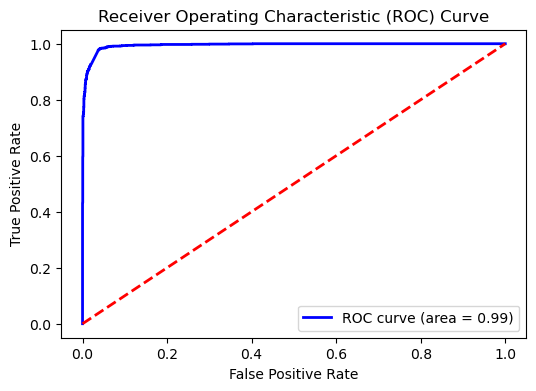

In [ ]:
# Classification Report
from sklearn.metrics import roc_curve, auc
print(classification_report(y_test, y_pred_binary))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

A confusion matrix is a performance evaluation tool used in classification tasks to analyze the model's predictions against the actual labels. It categorizes predictions into four types: true positives (correctly predicted positives), true negatives (correctly predicted negatives), false positives (incorrectly predicted as positives), and false negatives (incorrectly predicted as negatives).

From the confusion matrix, various metrics can be derived, such as accuracy (the proportion of correct predictions), precision (the proportion of true positive predictions among positive predictions), recall (sensitivity, the proportion of true positives among actual positives), specificity (the proportion of true negatives among actual negatives), and F1 score (a balance between precision and recall).

Confusion matrices provide a detailed understanding of a model's performance, helping to identify areas for improvement and select appropriate evaluation metrics based on the specific classification task.

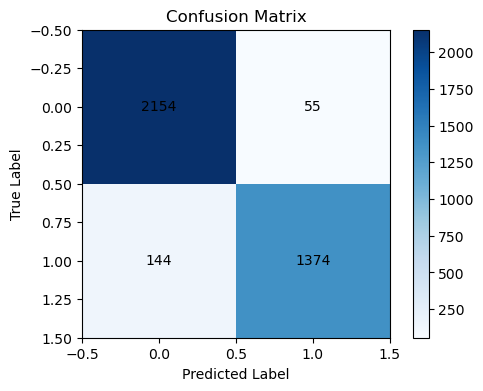

In [ ]:
# Assuming y_test and y_pred_binary are defined
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plotting the confusion matrix with annotated numbers
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add numerical values to the matrix cells
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Support Vector Machine

SVMs, a supervised machine learning algorithm, are commonly used within classification problems. They distinguish between two classes by finding the optimal hyperplane that maximizes the margin between the closest data points of opposite classes. The number of features in the input data determine if the hyperplane is a line in a 2-D space or a plane in a n-dimensional space. Since multiple hyperplanes can be found to differentiate classes, maximizing the margin between points enables the algorithm to find the best decision boundary between classes. This, in turn, enables it to generalize well to new data and make accurate classification predictions.

The SVM algorithm is widely used in machine learning as it can handle both linear and nonlinear classification tasks. However, when the data is not linearly separable, kernel functions are used to transform the data higher-dimensional space to enable linear separation. The choice of kernel function, such as linear kernels, polynomial kernels, radial basis function kernels or sigmoid kernels, depends on data characteristics and the specific use case.

Model 1

### We use a countVectorizer, a fundamental preprocessing step in many text analysis. It helps to convert raw text data into a format that can be easily processed and analyzed by machine learning algorithms. We then fit it to an SVM object. We use this to classify emails.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,precision_score, f1_score, recall_score,classification_report,confusion_matrix

# The column "email text" from the dataset is assigned to the variable x
x = data["Email Text"]

#Factorizes the column "Email Type" into numerical labels stored in y.
#"class_names" contains the unique classes in the target variable i.e. 0 for safe emails and 1 for phishing emails
y,class_names = pd.factorize(data['Email Type'],sort=True)

#splitting into train and test with a 25-75 split. A random_state of 42 is taken to ensure consistency to compare performance with different models
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

#Converts everything to string for easier proccessing
x_train = [str(x) for x in x_train]
x_test  = [str(x) for x in x_test]

#Initializes a CountVectorizer object
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

svm = SVC()
svm.fit(X_train_vectorized, y_train)

accuracy = svm.score(X_test_vectorized, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 59.88%


# Visualising the performace of model 1

Confusion Matrix:
[[2772    0]
 [1869   18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2772
           1       1.00      0.01      0.02      1887

    accuracy                           0.60      4659
   macro avg       0.80      0.50      0.38      4659
weighted avg       0.76      0.60      0.45      4659



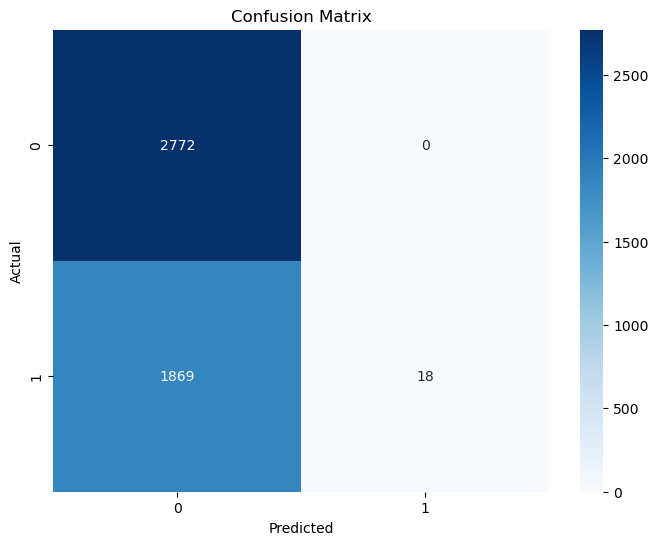

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
predictions = svm.predict(X_test_vectorized)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Classification report
cls_report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(cls_report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### This model stuggles to classify anything as spam. It classifies almost all emails as safe and as a result ends with a 45% overall weighted average accuracy but only 2% spam classfication accuracy

Model 2 - Tuning the Parameters

### We can improve the accuracy of the SVM model by tuning the parameters.

Common SVM parameters include:
1. Regularization Parameter C:
If we choose large value for C, we get small margin but lower misclassification
If we choose small value for C, we get large margin but high misclassification compared to large C value

2. Kernel
 Kernel is a mathematical function. These function takes data and transform it into a new form. We can classifiy datas linearly if we transform data into high dimensions. To do this, we can use kernel parameter. There are several options as kernel function such as linear, poly, rbf and sigmoid.

3. Gamma
Gamma parameter uses with non-linear kernels. The higher gamma try to provide more fitting. So if the gamma parameter select too high, it can cause overfitting.

### Although we tried many different combinations of parameters many did not even finish executing due to limited computation power at our disposal

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import multiprocessing
import pandas as pd

num_cores = multiprocessing.cpu_count()


x = data["Email Text"]
y, class_names = pd.factorize(data['Email Type'], sort=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = [str(x) for x in x_train]
x_test = [str(x) for x in x_test]


x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, test_size=0.5, random_state=42)


param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = tfidf_vectorizer.fit_transform(x_train_subset)
X_test_vectorized = tfidf_vectorizer.transform(x_test)


svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs= num_cores, verbose=1, return_train_score=True)
grid_search.fit(X_train_vectorized, y_train_subset)


cv_results = grid_search.cv_results_
for mean_test_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Parameters: {params}")
    print(f"Mean Test Score: {mean_test_score:.3f}")
    best_svm_model = SVC(**params)
    best_svm_model.fit(X_train_vectorized, y_train_subset)
    y_pred = best_svm_model.predict(X_test_vectorized)
    print(classification_report(y_test, y_pred))
    print('-' * 50)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Test Score: 0.858
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2209
           1       0.94      0.81      0.87      1518

    accuracy                           0.90      3727
   macro avg       0.91      0.89      0.90      3727
weighted avg       0.91      0.90      0.90      3727

--------------------------------------------------
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Test Score: 0.644
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      2209
           1       0.92      0.26      0.41      1518

    accuracy                           0.69      3727
   macro avg       0.79      0.62      0.60      3727
weighted avg       0.76      0.69      0.64      3727

--------------------------------------------------
Parameters: {'C': 1

### The classification report of each combination is printed along with the best paramerters

Model 3

## For this model we use a Tfidf vectorizer and a rbf kernal we fit these into a pipeline.

By combining preprocessing steps and the SVM classifier into a single pipeline, it becomes easier to apply the same sequence of transformations to both the training and test data, ensuring consistency and reducing the risk of data leakage or errors.

We use this pipeline to predict

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

# Load and preprocess data (same as before)
x = data["Email Text"]
y, class_names = pd.factorize(data['Email Type'], sort=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train = [str(x) for x in x_train]
x_test = [str(x) for x in x_test]

# Create and fit the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True, kernel='rbf'))  # Using a non-linear kernel
])
pipeline.fit(x_train, y_train)

print("PREDICTING ON TRAIN")
y_pred = pipeline.predict(x_train)
report = classification_report(y_train, y_pred)
print(report)

print("PREDICTING ON TEST")
y_new = pipeline.predict(x_test)
reportnew = classification_report(y_test, y_new)
print(reportnew)

PREDICTING ON TRAIN
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8550
           1       0.97      1.00      0.99      5425

    accuracy                           0.99     13975
   macro avg       0.99      0.99      0.99     13975
weighted avg       0.99      0.99      0.99     13975

PREDICTING ON TEST
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2772
           1       0.96      0.98      0.97      1887

    accuracy                           0.97      4659
   macro avg       0.97      0.98      0.97      4659
weighted avg       0.98      0.97      0.97      4659



Visualizing model 3

Confusion matrix and ROC curve

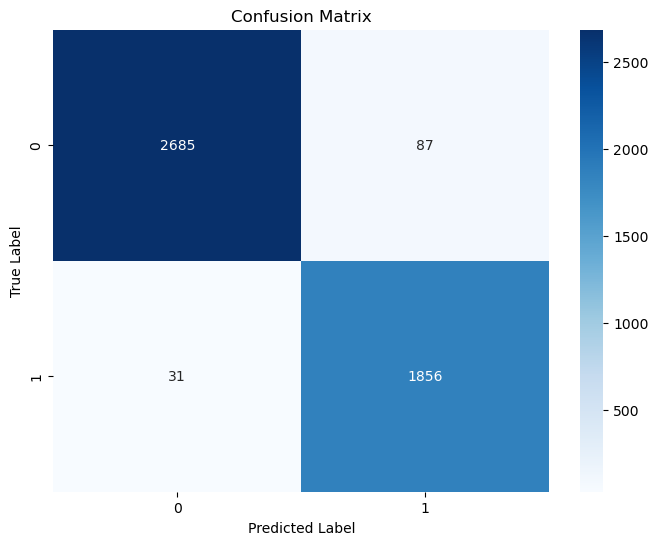

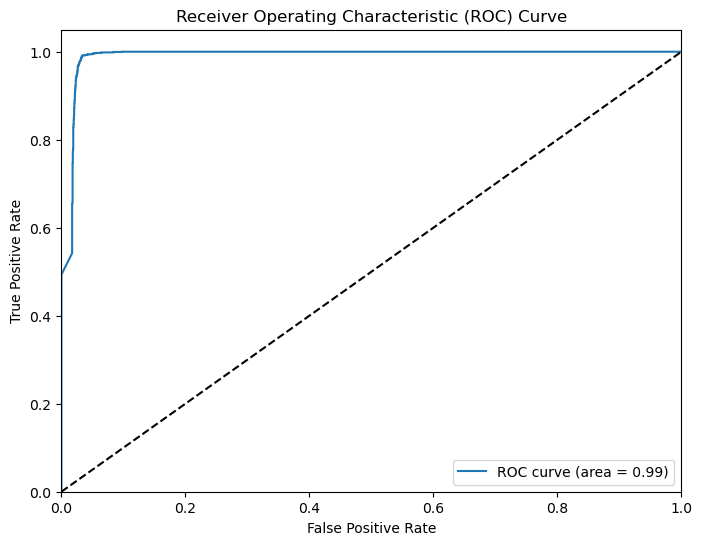

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

cm = confusion_matrix(y_test, y_new)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

probas = pipeline.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

By this method we get the most accurate model

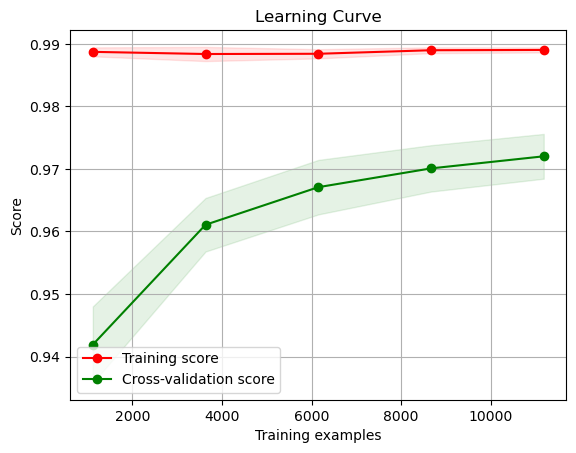

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    pipeline, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), return_times=True)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Trying model 3 with custom inputs

In [ ]:
new_email = """Subject: Urgent: Account Verification Required Immediately!
Dear Valued Customer,
We have recently detected suspicious activity on your account, which raises concerns about the security of your
personal information. To ensure the safety and integrity of your account, we urgently require you to verify your
account details by clicking on the link provided below:
www.linkedin.com
Failure to verify your account within the next 24 hours may result in temporary suspension or restricted access
to your account. We understand the importance of maintaining the confidentiality of your data and appreciate your
prompt attention to this matter.
Please note that this email is sent from a secure system and is intended solely for the recipient named above.
If you believe this email was sent to you in error, please disregard this message and do not click on any links.
Thank you for your cooperation in helping us maintain the security of our systems and your account.

Sincerely,

Jil Security Team"""
prediction = pipeline.predict([new_email])
print(f"Prediction: {'Phishing' if prediction[0] == 1 else 'Not Phishing'}")


Prediction: Phishing


In [ ]:
new_email = """Dear aditya040,
You are invited to participate in an online study launched by a research group at NBS. Please find the details as
follows.
Duration: 5 minutes
Payment: A chance to win SG$20
To participate, please visit:
https://Laksh.com/default.aspx?p_return_experiment_id=1265
Upon your sign-up, you can find the study link in SONA system. You need to work on the study on a PC or laptop
in a quiet environment.
The number of participants is limited, and sign-up will be available on a first-come-first-served basis. Once
the maximum number of sign-ups reaches, you may find "There are no timeslots currently available" on the page.
If you encounter any problems or questions during the study,
please contact Mr. Laksh (email: lakshlucky@gmail.com)
Best regards

Laksh

You may logon to the site at https://ntu-nbs.sona-systems.com
"""
prediction = pipeline.predict([new_email])
print(f"Prediction: {'Phishing' if prediction[0] == 1 else 'Safe Email'}")

Prediction: Safe Email
